In [6]:
from keras.datasets import reuters

C:\Users\Eric\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 7s 3us/step


In [9]:
len(train_data)

8982

In [10]:
len(test_data)

2246

In [13]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [20]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [23]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [38]:
# Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
'''
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
'''
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [35]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [36]:
# Compiling the model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
# Train the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 239us/step - loss: 2.4992 - acc: 0.4904 - val_loss: 1.6810 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 2s 192us/step - loss: 1.3909 - acc: 0.7035 - val_loss: 1.2778 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 2s 211us/step - loss: 1.0479 - acc: 0.7702 - val_loss: 1.1175 - val_acc: 0.7620
Epoch 4/20
7982/7982 [==============================] - 2s 202us/step - loss: 0.8240 - acc: 0.8279 - val_loss: 1.0220 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 2s 217us/step - loss: 0.6594 - acc: 0.8634 - val_loss: 0.9706 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 2s 196us/step - loss: 0.5247 - acc: 0.8935 - val_loss: 0.9204 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.4285 - acc: 0.9110 - val_loss: 0.9118 - val_acc: 0.8030


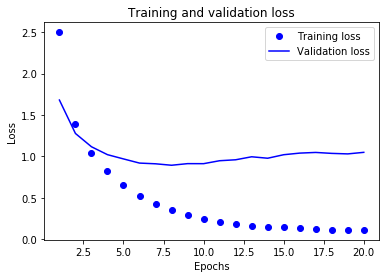

In [43]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

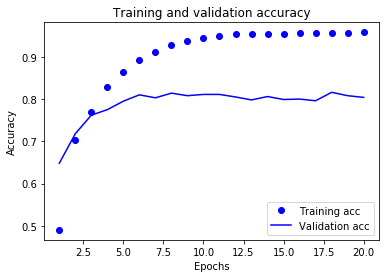

In [45]:
# Plotting the training and validation accuracy
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [48]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 226us/step - loss: 2.5423 - acc: 0.5219 - val_loss: 1.6786 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 184us/step - loss: 1.3775 - acc: 0.7101 - val_loss: 1.2792 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 180us/step - loss: 1.0205 - acc: 0.7788 - val_loss: 1.1351 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.8044 - acc: 0.8245 - val_loss: 1.0555 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 177us/step - loss: 0.6446 - acc: 0.8616 - val_loss: 0.9740 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.5151 - acc: 0.8923 - val_loss: 0.9094 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.4137 - acc: 0.9151 - val_loss: 0.8939 - val_acc: 0.8240
Epoch 8

In [49]:
# Comparing results to a purely random classifier

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [50]:
# Generating predictions for new data
predictions = model.predict(x_test)

In [51]:
predictions[0].shape

(46,)

In [52]:
np.sum(predictions[0])

1.0000002

In [54]:
np.argmax(predictions[0])

3

In [ ]:
# Different way to handle labels and loss: integers
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [61]:
# A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=10,
         batch_size=500,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 5s 632us/step - loss: 2.2366 - acc: 0.4964 - val_loss: 1.5259 - val_acc: 0.6600
Epoch 2/10
7982/7982 [==============================] - 5s 651us/step - loss: 1.2297 - acc: 0.7036 - val_loss: 1.1669 - val_acc: 0.7300
Epoch 3/10
7982/7982 [==============================] - 6s 743us/step - loss: 0.8450 - acc: 0.7902 - val_loss: 1.0776 - val_acc: 0.7580
Epoch 4/10
7982/7982 [==============================] - 6s 704us/step - loss: 0.6163 - acc: 0.8434 - val_loss: 1.0079 - val_acc: 0.7890
Epoch 5/10
7982/7982 [==============================] - 6s 708us/step - loss: 0.4372 - acc: 0.8891 - val_loss: 1.2559 - val_acc: 0.7680
Epoch 6/10
7982/7982 [==============================] - 5s 624us/step - loss: 0.3096 - acc: 0.9216 - val_loss: 1.0227 - val_acc: 0.8060
Epoch 7/10
7982/7982 [==============================] - 5s 667us/step - loss: 0.2171 - acc: 0.9422 - val_loss: 2.2211 - val_acc: 0.6680


KeyboardInterrupt: 